In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import seaborn as sns
sns.set_theme()

df = pd.read_csv('./data/meow_pct.csv')

df.rename(columns={'PCT(180)':'Marks'}, inplace=True)
# df.rename(columns={'ID NO':'ID'}, inplace=True)
df['ID'] = df['ID'].str[:-1]

# drop rows with all any NaN values
df.dropna(axis=0, how='any', inplace=True)

%load_ext autoreload
%autoreload 2

df.reset_index(drop=True, inplace=True)

df

,ID,Midsem (100),T1,T2,T3,T4,T5,Best 4,Tut(80),Marks
0,0673,41,7.0,15.0,6,6.0,9.0,37.0,50,91
1,0938,23,0.0,15.0,15,15.0,15.0,60.0,80,103
2,0251,21,10.0,9.0,5,4.0,5.0,29.0,39,60
3,0141,38,15.0,15.0,15,0.0,15.0,60.0,80,118
4,0023,8,0.0,3.0,3,0.0,0.0,6.0,8,16
...,...,...,...,...,...,...,...,...,...,...
576,0570,29,13.0,0.0,15,15.0,15.0,58.0,78,107
577,0022,1,0.0,11.0,4,0.0,11.0,26.0,35,36
578,1040,24,1.0,8.0,4,1.0,0.0,14.0,19,43
579,1351,4,0.0,6.0,0,11.0,5.0,22.0,30,34


In [3]:
cp_df = pd.read_csv('./data/CP/cp_compre.csv')
cp_df['code'] = cp_df['ID'].str[4:6]
cp_df['ID No'] = cp_df['ID'].str[8:-1]
cp_df

,ID,Name,Part_A(36M),Part_B(36M),Total(72M),code,ID No
0,2022A1PS0530P,IRA DOGRA,10.000000,10.000000,20.000000,A1,0530
1,2022A1PS0589P,ASLESH JAMBHALE,29.000000,27.000000,56.000000,A1,0589
2,2022A1PS0593P,AAYUSH AASHISH MAHESHWARI,15.000000,18.000000,33.000000,A1,0593
3,2022A1PS0643P,SHIVANG GUPTA,28.000000,24.000000,52.000000,A1,0643
4,2022A1PS0661P,ARYAMAN DUBEY,8.000000,12.000000,20.000000,A1,0661
...,...,...,...,...,...,...,...
593,2022AAPS0366P,DIWAKAR MITTAL,18.000000,20.000000,38.000000,AA,0366
594,2022AAPS0369P,SUBRAT ROY,19.000000,23.000000,42.000000,AA,0369
595,2022AAPS1191P,SHAILENDRA KUMAR GUPTA,NaN,NaN,NaN,AA,1191
596,2022AAPS1192P,KUSHAAGRA SINGH,20.000000,15.000000,35.000000,AA,1192


In [4]:
for i in range(len(df)):
    if df.loc[i, 'ID'] in cp_df['ID No'].values:
        df.loc[i, 'code'] = cp_df[cp_df['ID No'] == df.loc[i, 'ID']]['code'].values[0]

df

,ID,Midsem (100),T1,T2,T3,T4,T5,Best 4,Tut(80),Marks,code
0,0673,41,7.0,15.0,6,6.0,9.0,37.0,50,91,A4
1,0938,23,0.0,15.0,15,15.0,15.0,60.0,80,103,A4
2,0251,21,10.0,9.0,5,4.0,5.0,29.0,39,60,AA
3,0141,38,15.0,15.0,15,0.0,15.0,60.0,80,118,A7
4,0023,8,0.0,3.0,3,0.0,0.0,6.0,8,16,A3
...,...,...,...,...,...,...,...,...,...,...,...
576,0570,29,13.0,0.0,15,15.0,15.0,58.0,78,107,A8
577,0022,1,0.0,11.0,4,0.0,11.0,26.0,35,36,A3
578,1040,24,1.0,8.0,4,1.0,0.0,14.0,19,43,A1
579,1351,4,0.0,6.0,0,11.0,5.0,22.0,30,34,A1


In [5]:
# count the number of entries with nan value
df.isna().sum()

ID              0
Midsem (100)    0
T1              0
T2              0
T3              0
T4              0
T5              0
Best 4          0
Tut(80)         0
Marks           0
code            1
dtype: int64

In [6]:
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,ID,Midsem (100),T1,T2,T3,T4,T5,Best 4,Tut(80),Marks,code
0,0673,41,7.0,15.0,6,6.0,9.0,37.0,50,91,A4
1,0938,23,0.0,15.0,15,15.0,15.0,60.0,80,103,A4
2,0251,21,10.0,9.0,5,4.0,5.0,29.0,39,60,AA
3,0141,38,15.0,15.0,15,0.0,15.0,60.0,80,118,A7
4,0023,8,0.0,3.0,3,0.0,0.0,6.0,8,16,A3
...,...,...,...,...,...,...,...,...,...,...,...
575,0570,29,13.0,0.0,15,15.0,15.0,58.0,78,107,A8
576,0022,1,0.0,11.0,4,0.0,11.0,26.0,35,36,A3
577,1040,24,1.0,8.0,4,1.0,0.0,14.0,19,43,A1
578,1351,4,0.0,6.0,0,11.0,5.0,22.0,30,34,A1


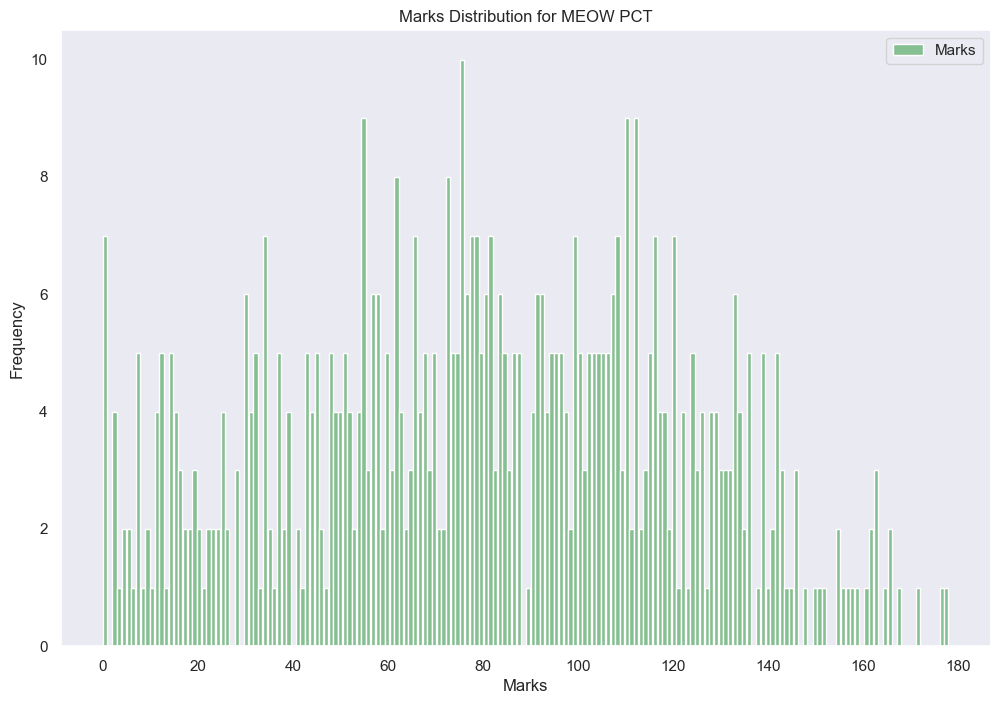

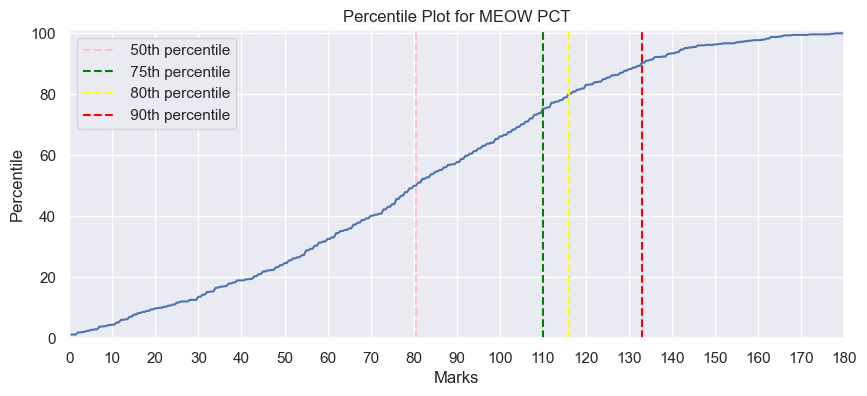

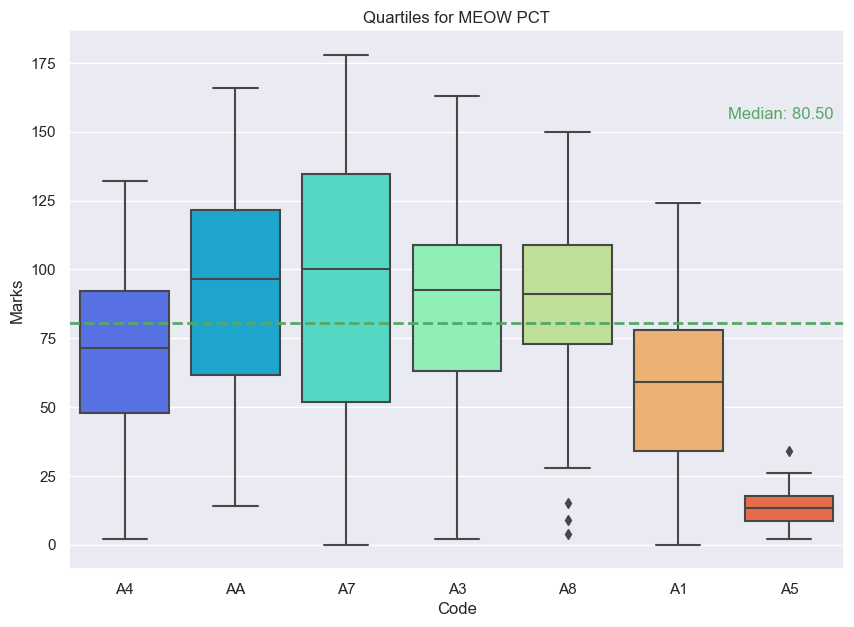

In [11]:
from graph_gen import graph

g = graph('MEOW PCT', df, 180, codes=True)
g.gen_all()

In [11]:
df3 = pd.read_csv('./data/meow_post_compre.csv')

df3.rename(columns={'CT(300)':'Marks'}, inplace=True)
df3['ID'] = df3['ID'].str[:-1]

%load_ext autoreload
%autoreload 2

df3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,ID,Mid,T1,T2,T3,T4,T5,Best 4,Tut(80),PCT,Comp(45),Comp(75),Comp,Marks
0,0437,13,0.0,9.0,4,0.0,0.0,13.0,18,31,6,0,6,37
1,0249,35,1.0,11.0,15,0.0,3.0,30.0,40,75,15,16,31,106
2,0694,37,15.0,15.0,15,15.0,11.0,60.0,80,117,11,5,16,133
3,0424,13,13.0,11.0,15,11.0,15.0,54.0,72,85,2,1,3,88
4,0218,23,5.0,15.0,6,6.0,0.0,32.0,43,66,14,7,21,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,1354,5,0.0,15.0,15,15.0,5.0,50.0,67,72,2,3,5,77
588,0911,13,10.0,1.0,4,4.0,1.0,19.0,26,39,0,0,0,39
589,1311,18,4.0,12.0,12,9.0,12.0,45.0,60,78,6,5,11,89
590,0831,43,12.5,9.5,4,0.0,0.0,26.0,35,78,6,4,10,88


In [13]:
for i in range(len(df3)):
    if df3.loc[i, 'ID'] in cp_df['ID No'].values:
        df3.loc[i, 'code'] = cp_df[cp_df['ID No'] == df3.loc[i, 'ID']]['code'].values[0]

df3

,ID,Mid,T1,T2,T3,T4,T5,Best 4,Tut(80),PCT,Comp(45),Comp(75),Comp,Marks,code
0,0437,13,0.0,9.0,4,0.0,0.0,13.0,18,31,6,0,6,37,A3
1,0249,35,1.0,11.0,15,0.0,3.0,30.0,40,75,15,16,31,106,AA
2,0694,37,15.0,15.0,15,15.0,11.0,60.0,80,117,11,5,16,133,A4
3,0424,13,13.0,11.0,15,11.0,15.0,54.0,72,85,2,1,3,88,A8
4,0218,23,5.0,15.0,6,6.0,0.0,32.0,43,66,14,7,21,87,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,1354,5,0.0,15.0,15,15.0,5.0,50.0,67,72,2,3,5,77,A1
588,0911,13,10.0,1.0,4,4.0,1.0,19.0,26,39,0,0,0,39,A4
589,1311,18,4.0,12.0,12,9.0,12.0,45.0,60,78,6,5,11,89,A1
590,0831,43,12.5,9.5,4,0.0,0.0,26.0,35,78,6,4,10,88,A4


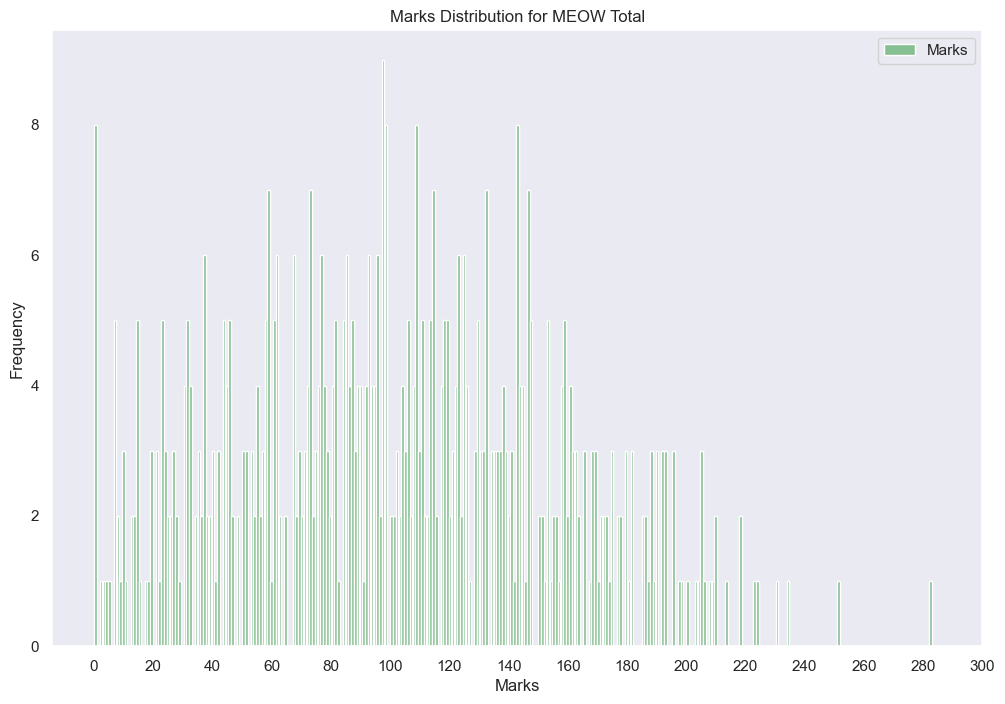

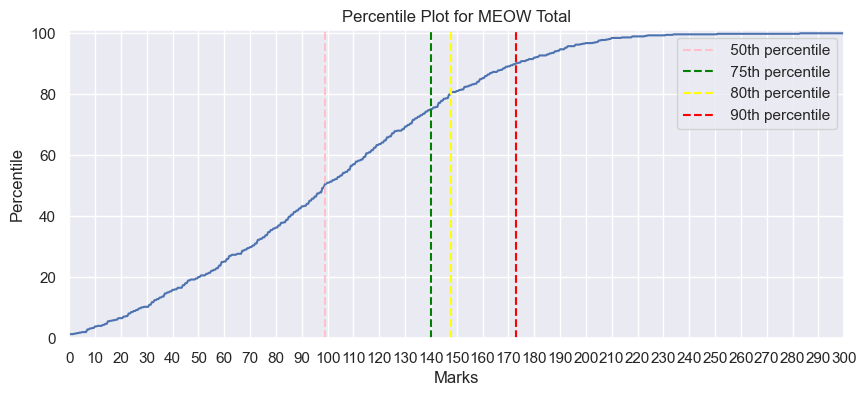

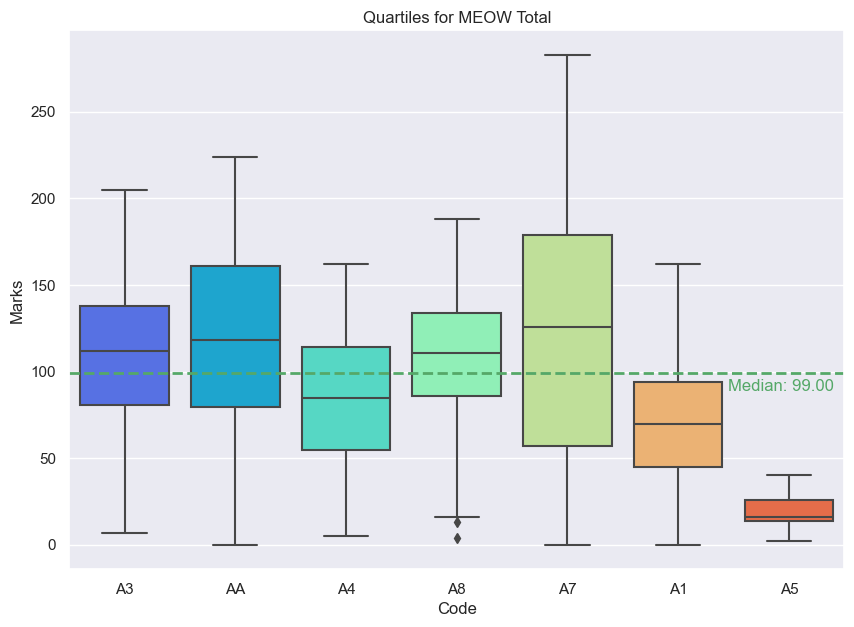

In [17]:
from graph_gen import graph

g = graph('MEOW Total', df3, 300, codes=True)
g.gen_all()

In [20]:
g.gen_ranks(numbers=True)